# Welcome to music21!

music21 is a powerful application developed by Michael Cuthbert at MIT for analyzing music.

## Starting music21

music21 runs on Python, which is a programming framework. In order to start music21, you need to tell Python to load it. In order to do that, you will need to **type** (don't copy and paste) the following code into the box below:

    from music21 import *
    
To execute this command, hit Shift+Enter (Windows) or Ctrl+Enter (Mac).

In [1]:
from music21 import *

If you received an error mesage, you will need to double-check that you have entered your code properly. You can just edit your code and then execute your command again.

Otherwise, if you did nothing changed, you have successfully loaded the music21 library into Python. This will allow you to start running your music analyses!

## Import your file
Now that you have music21 running, you will want to import your music file so that you can start analyzing it. To do this, we will need to follow a couple of steps.

First, we need to tell Python where to go to get the file. To do this, we will declare a variable called "filePath" and set its value to the location of your musicXML file. Since the path is a string, or series of alpha-numeric characters, you need to put the path in quotes. So, execute the following code:

    filePath = "[enter your file path here]"

In [4]:
filePath = "data/tondikter_mxml.musicxml"

It is now time to tell Python to import your file. This is actually a complicated process in which python must import and structure all of the voices, bars, notes, etc. in a way that it can understand. Thankfully, music21 has a converter command that can do this for you. This time, instead of executing just one command, we are going to tell python to run two commands at once. Each command will be separated by a line break, created by pressing enter. Execute the following (pressing the Shift+Enter or Ctrl+Enter **after** typing **both** lines):

    p = converter.parse(filePath)
    print(p)

If you get an error, double check that you have entered your code correctly. 

In [5]:
p= converter.parse(filePath)
print(p)

<music21.stream.Score 0x1a688d220d0>


Although music21 offers support for MEI files, it was originally developed to work with musicXML files. Therefore, music21 can struggle to parse more complicated MEI files.

If you are successful in executing the above code, you should see something like the following:

    <music21.stream.Score 0x24e272dda90>
    
This means that music21 has stored your score in something called a stream, and that stream has a unique identifier (0x24e272dda90 in my case). A stream is simply a data structure, and in music21 it is spaced in time. So, each object has an offset that represents how many quarter notes it lies from the beginning. A stream can (and often does) contain other streams for scores, parts, and measures. If you want to see the structures and values in your stream, you will have to run a looping command in Python. This means that you run a command (or series of commands) over and over as long as a particular condition is met. For a loop in Python, you start with 'for' and then place a colon (:) after you have written the condition statement. The looped code is then placed on the next line and indented. To see your stream, use the following code:

    for el in p.recurse():
        print(el.offset, el, el.activeSite)

In [6]:
for el in p.recurse():
    print(el.offset, el, el.activeSite)

0.0 <music21.text.TextBox 'Smärre Ton...'> <music21.stream.Score 0x1a688d220d0>
0.0 <music21.text.TextBox '(i sammanh...'> <music21.stream.Score 0x1a688d220d0>
0.0 <music21.text.TextBox 'Elfrida An...'> <music21.stream.Score 0x1a688d220d0>
0.0 <music21.metadata.Metadata object at 0x1a688d22cd0> <music21.stream.Score 0x1a688d220d0>
0.0 <music21.stream.PartStaff P1-Staff1> <music21.stream.Score 0x1a688d220d0>
0.0 P1: Piano: Piano <music21.stream.PartStaff P1-Staff1>
0.0 <music21.stream.Measure 1 offset=0.0> <music21.stream.PartStaff P1-Staff1>
0.0 <music21.layout.SystemLayout> <music21.stream.Measure 1 offset=0.0>
0.0 <music21.clef.TrebleClef> <music21.stream.Measure 1 offset=0.0>
0.0 <music21.key.KeySignature of 1 flat> <music21.stream.Measure 1 offset=0.0>
0.0 <music21.meter.TimeSignature 4/4> <music21.stream.Measure 1 offset=0.0>
0.0 <music21.note.Rest whole> <music21.stream.Measure 1 offset=0.0>
0.0 <music21.spanner.Slur <music21.chord.Chord F3 C4><music21.chord.Chord A3 F4>> <music2

## Analyzing your score
Now that your score is loaded in Python, you can start to analyze it. The following will introduce some of the basic ways that music21 can analyze a score. If you would like to learn more, have a look at the User Manual available online at: http://web.mit.edu/music21/doc/usersGuide/index.html.

### Transform your score to chords
Sometimes it can be helpful to view the chordal structures within your score. To distill your score into a chord form, use the following code, being sure to differentiate the single quotes and double quotes:

    pChords = p.chordify()
    pChords.write('musicxml', fp="chords.xml")

In [7]:
pChords = p.chordify()
pChords.write('musicxml', fp="chords.xml")

WindowsPath('c:/Users/albod/OneDrive - University of Glasgow/DMIS Honors/MCA/MCA-2023-fork/chords.xml')

You will notice in this series of commands that we first set a new variable, pChords. The value of that variable was p (which, you will recall is the stream that contains your score). You will note, however, that ".chordify()" follows that p variable. This is the command that will distill your score into chords. 

The second command simply writes the result of your chordify command to a musicXML file that will be called "chords.xml".

You will note that the chords are quite complex, but you can have music21 simplify them into closed position. To do this, run the following loop:

    for c in pChords.recurse().getElementsByClass('Chord'):
        c.closedPosition(forceOctave=4, inPlace=True)
    pChords.write('musicxml', fp="chords.xml")

In order to run the second command (the loop is the first), you will need to make sure that you are no longer indented. Usually this is accomplished by pressing the Enter key and then hitting the backspace.

In [12]:
for c in pChords.recurse().getElementsByClass('Chord'):
    c.closedPosition(forceOctave=4, inPlace=True)

pChords.write('musicxml', fp="chords.xml")

WindowsPath('c:/Users/albod/OneDrive - University of Glasgow/DMIS Honors/MCA/MCA-2023-fork/chords.xml')

### Perform harmonic analysis
music21 can now analyze your chords. To do this, type the following:

    pAnalysis = pChords
    for c in pAnalysis.recurse().getElementsByClass('Chord'):
        rn = roman.romanNumeralFromChord(c, key.Key('F'))
        c.addLyric(str(rn.figure))
    
    pAnalysis.write('musicxml', fp="ChordAnalysis.xml")


In [14]:
pAnalysis = pChords
for c in pAnalysis.recurse().getElementsByClass('Chord'):
    rn = roman.romanNumeralFromChord(c, key.Key('F'))
    c.addLyric(str(rn.figure))
    
pAnalysis.write('musicxml', fp="ChordAnalysis.xml")

WindowsPath('c:/Users/albod/OneDrive - University of Glasgow/DMIS Honors/MCA/MCA-2023-fork/ChordAnalysis.xml')

### Get the ambitus
music21 can extract the range of a particular voice or instrument. To do this, you will need to figure out which part you would like to analyze. If you are struggling to determine that, you can review the stream structure we displayed above. If you do know the part, use the following, substituting the 0 with the proper part number:

    print(p.parts[0].analyze('ambitus'))

In [16]:
print(p.parts[1].analyze('ambitus'))

<music21.interval.Interval M27>


### Piano roll of pitches
music21 can generate a piano roll of your pitches. Again, it can help if you know the part that you wish to plot. This code will also ask you for which measures you wish to plot:

    voice = p.parts[0]
    voice.measures(1, 10).plot()

Once again, you can change which part you wish to plot by modifying the 0 in the first line. You can select the measures you wish to plot as well. In the second line, the 1 is the first measure to plot, and the 10 is the last measure. So, "voice.measures(40,75).plot()" would capture measures 40 through 75.

If you would like to use this or any other visualization in your report, all you need to do is save the image it generates. For Windows, right-click on the image and select "Save Image As". Mac users click and hold on the image and select the same.

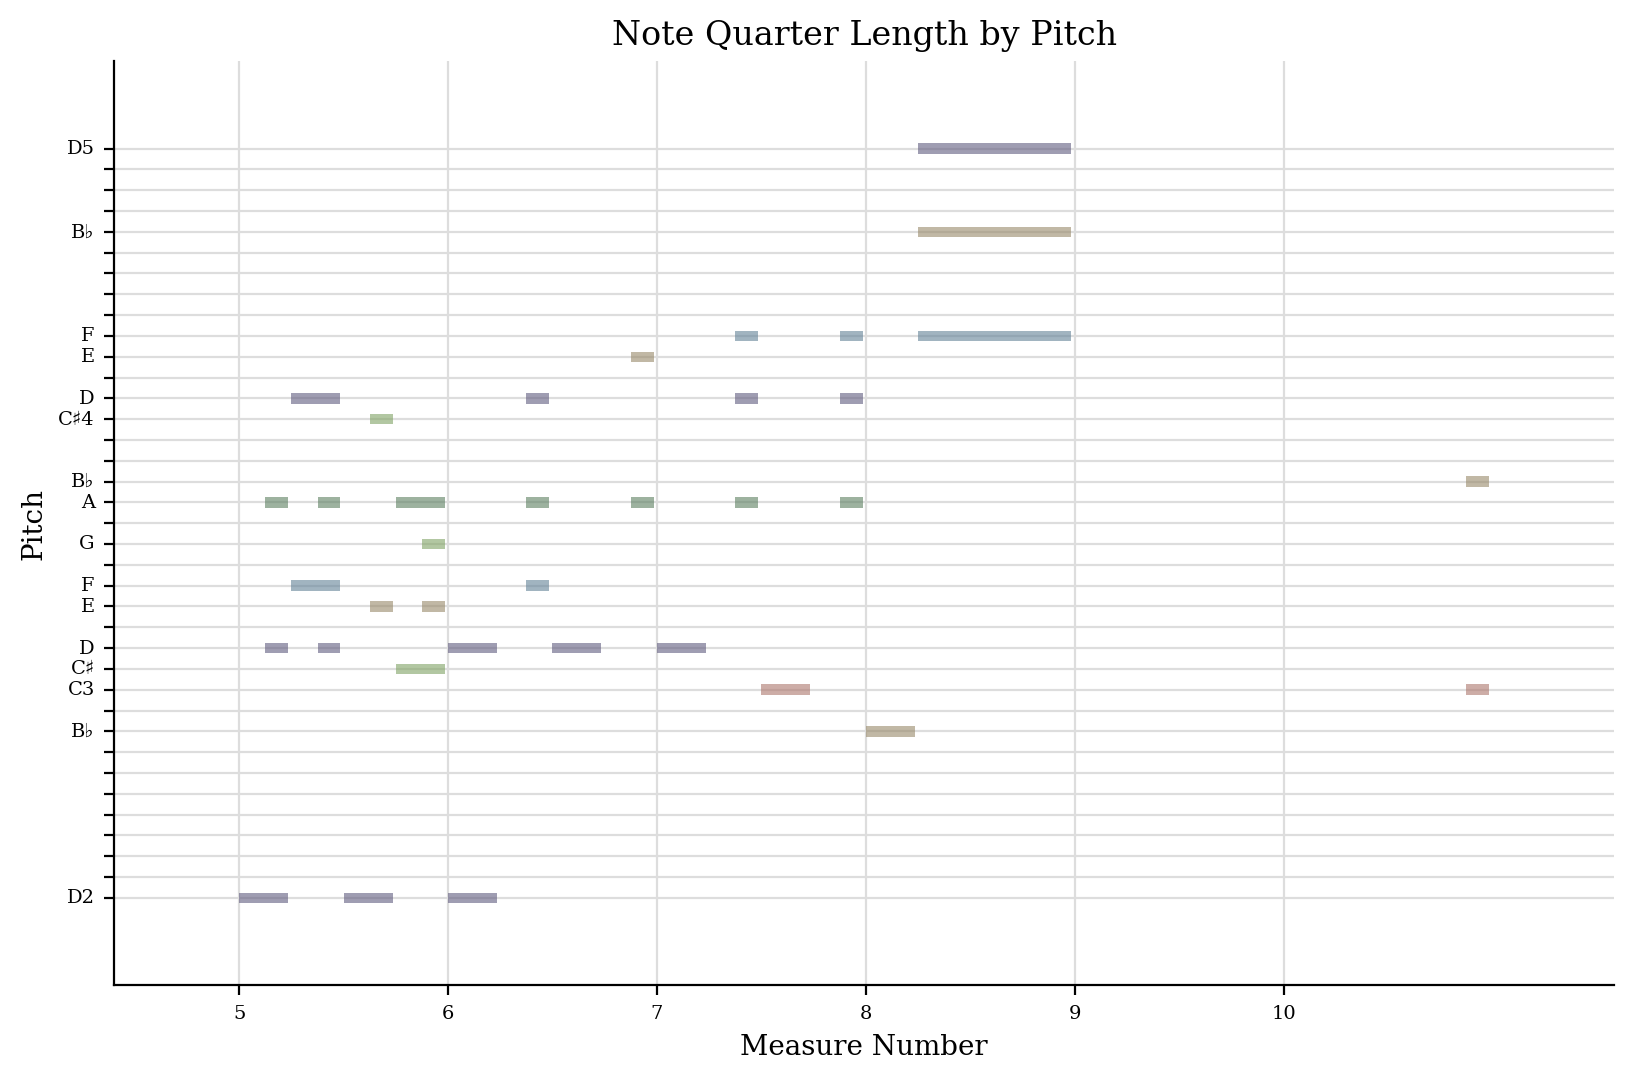

In [18]:
voice = p.parts[1]
voice.measures(5, 10).plot()

### Scatter plot of pitches
You can also generate a visualization of the pitches that are present in your piece. To do that, run the following code:

    p.plot('scatter', 'quarterLength', 'pitch', title='My Scatter Plot')
 

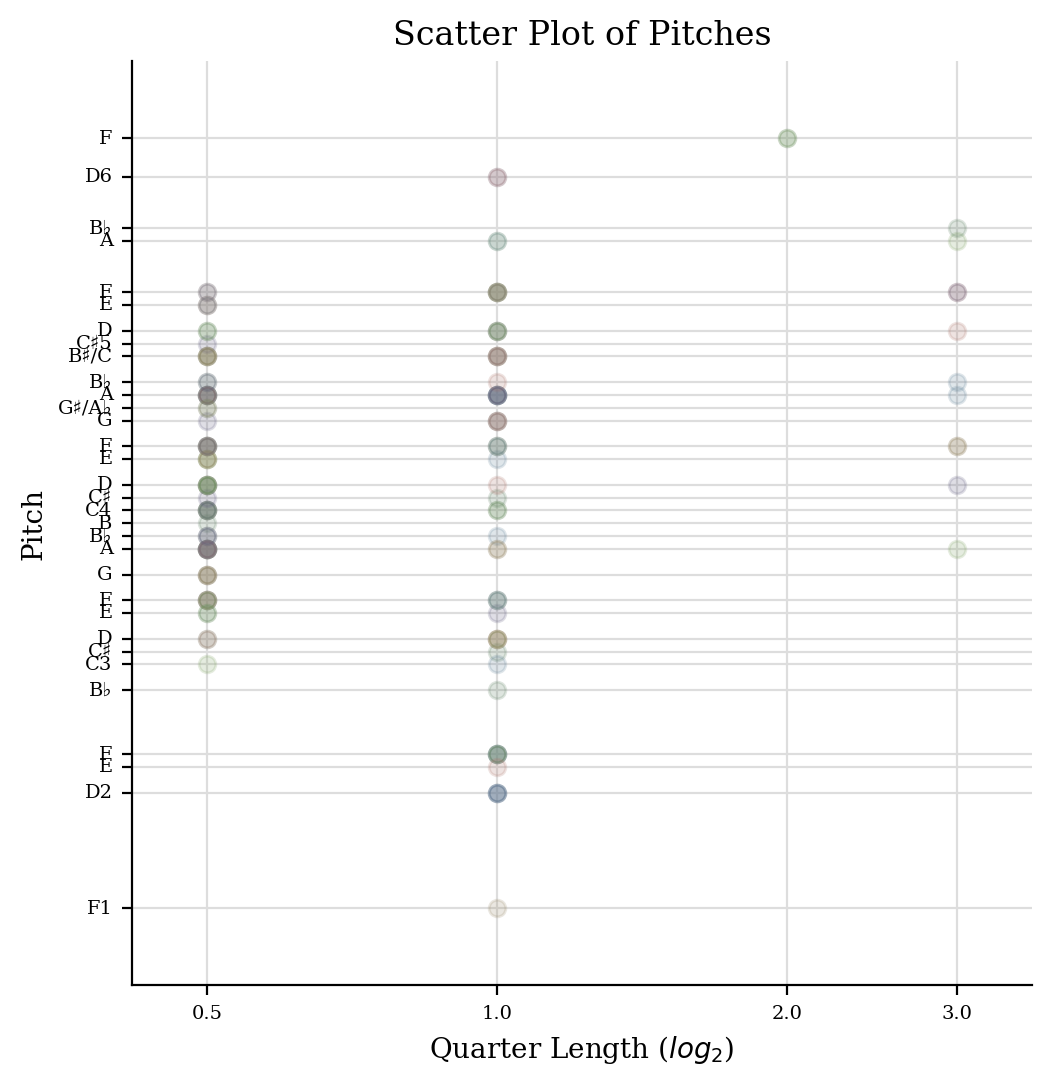

In [20]:
p.plot('scatter', 'quarterLength', 'pitch', title='Scatter Plot of Pitches')

### Pitch histogram
You can see which pitches are used most (or least) in your piece by creating a histogram. To do this, run:

    p.plot('histogram', 'octave', xHideUnused=False, xAxisLabel='Number of Pitches')

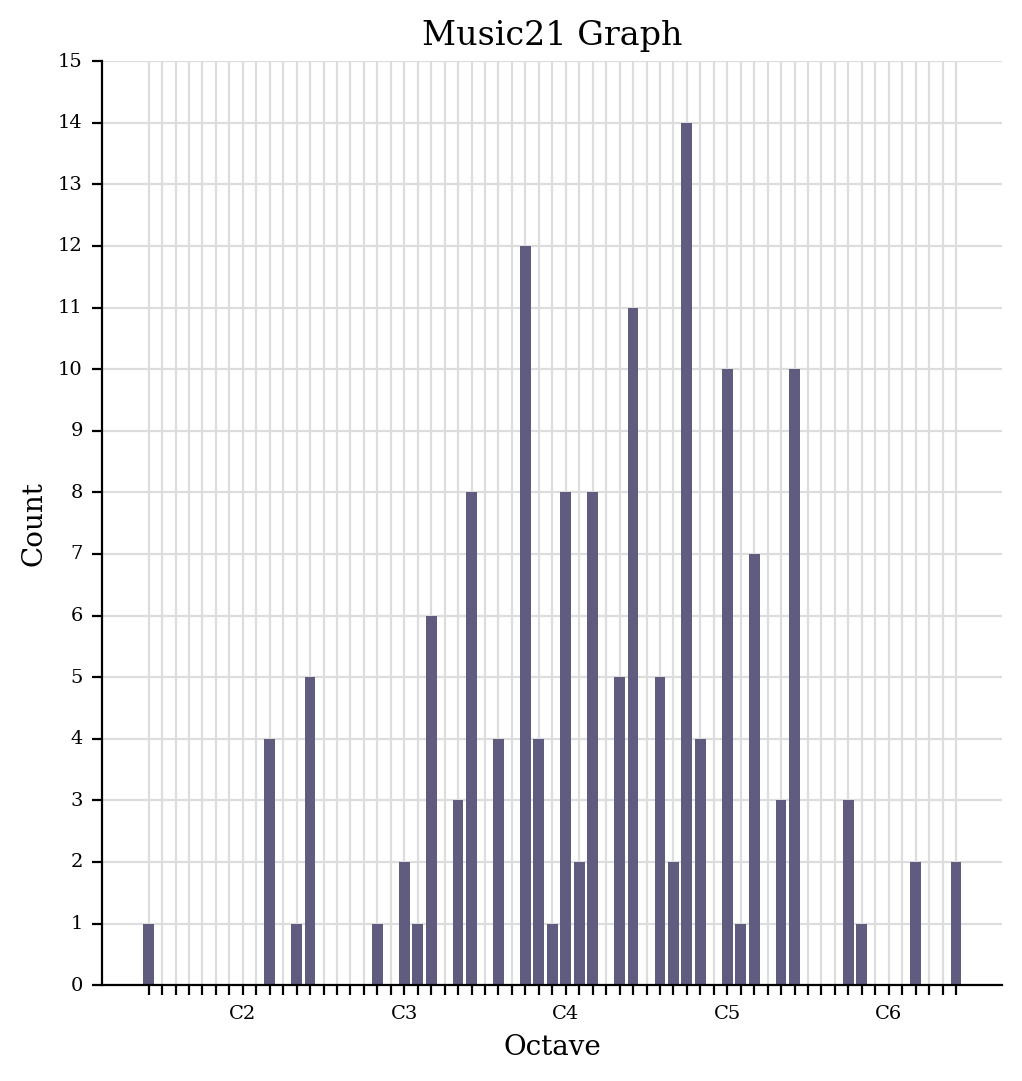

In [21]:
p.plot('histogram', 'octave', xHideUnused=False, xAxisLabel='Number of Pitches')